In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

<Figure size 1200x320 with 0 Axes>

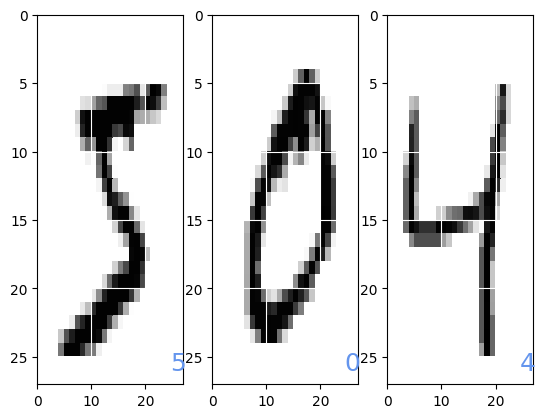

In [ ]:
for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" %y_train[id], color="cornflowerblue", fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid("on", color="white")

plt.show()

# **2층 피드포워드 네트워크 모델**

In [ ]:
from tensorflow.python.keras.utils import np_utils
#출처: https://www.pmguda.com/810 [내 남자의 길~!:티스토리]

x_train = x_train.reshape(60000, 784) # 이미지 한 장을 한 줄 벡터로 모양 변환
x_train = x_train.astype('float32') # int ->float
x_train = x_train / 255 # 255로 나눔

num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes) # 원핫 인코딩

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() #Sequential() 층층이 순서대로 연산되는 모델

model.add(Dense(16, input_dim=784, activation='sigmoid')) # 16개 뉴런 갖는 중간충
model.add(Dense(10, activation='softmax')) # (C) 10개의 출력층
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # 아담으로 최적화

In [ ]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # 학습 내용 기록
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 7s 31ms/step - loss: 2.0342 - accuracy: 0.4109 - val_loss: 1.4954 - val_accuracy: 0.5999
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 1.5927 - accuracy: 0.6578 - val_loss: 1.2169 - val_accuracy: 0.7166
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 1.3126 - accuracy: 0.7480 - val_loss: 1.0245 - val_accuracy: 0.7654
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 1.1039 - accuracy: 0.7980 - val_loss: 0.8753 - val_accuracy: 0.8004
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.9440 - accuracy: 0.8357 - val_loss: 0.7587 - val_accuracy: 0.8297
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.8211 - accuracy: 0.8605 - val_loss: 0.6705 - val_accuracy: 0.8485
Epoch 7/10
60/60 [==============================] - 1s 8ms/step - loss: 0.7264 - accuracy: 0.8725 - val_loss: 0.6047 - val_accuracy: 0.8632
Epoch 8/10
60/6

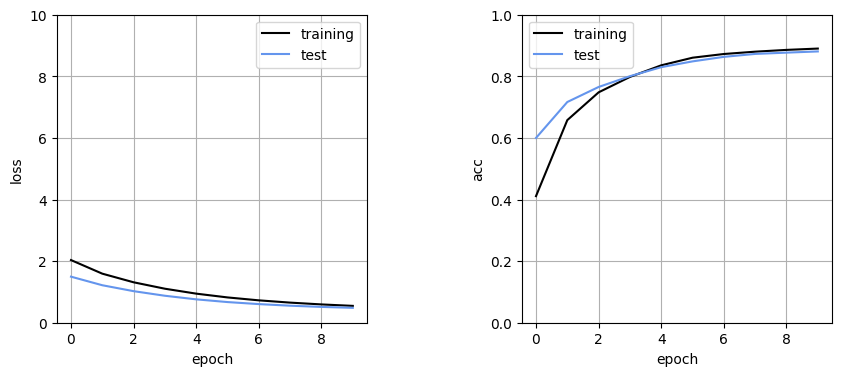

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="test", color="cornflowerblue")
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="training", color="black")
plt.plot(history.history["val_accuracy"], label="test", color="cornflowerblue")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

313/313 [==============================] - 1s 3ms/step


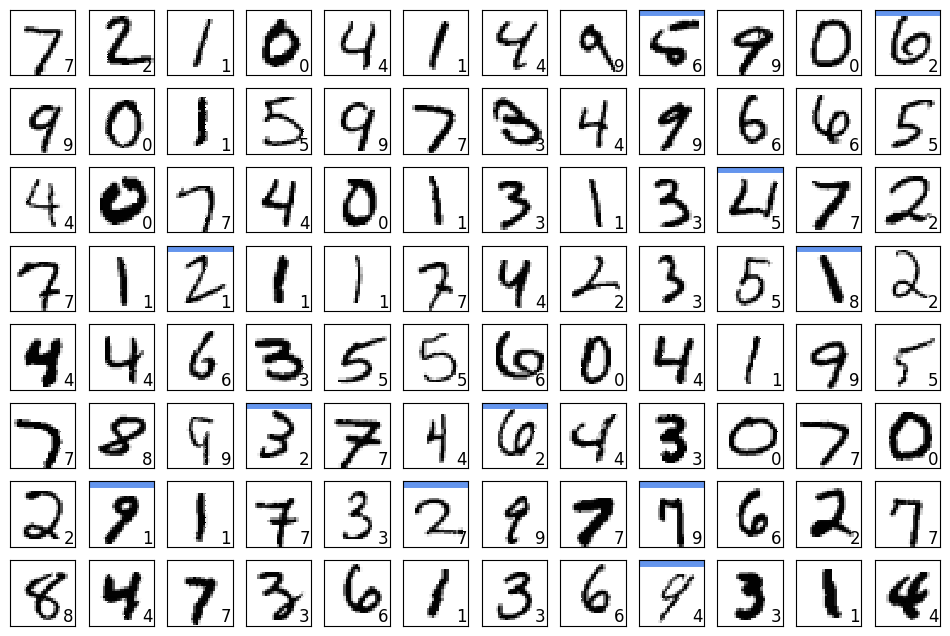

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

# **Relu 사용**

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 1.5063 - accuracy: 0.5476 - val_loss: 48.9141 - val_accuracy: 0.7847
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.8297 - val_loss: 40.9374 - val_accuracy: 0.8684
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.8747 - val_loss: 39.4216 - val_accuracy: 0.8932
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3966 - accuracy: 0.8923 - val_loss: 38.6227 - val_accuracy: 0.9055
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.9030 - val_loss: 37.9193 - val_accuracy: 0.9101
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3246 - accuracy: 0.9098 - val_loss: 36.9604 - val_accuracy: 0.9166
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.9154 - val_loss: 37.2619 - val_accuracy: 0.9184
Epoch 8/10
60

313/313 [==============================] - 1s 2ms/step


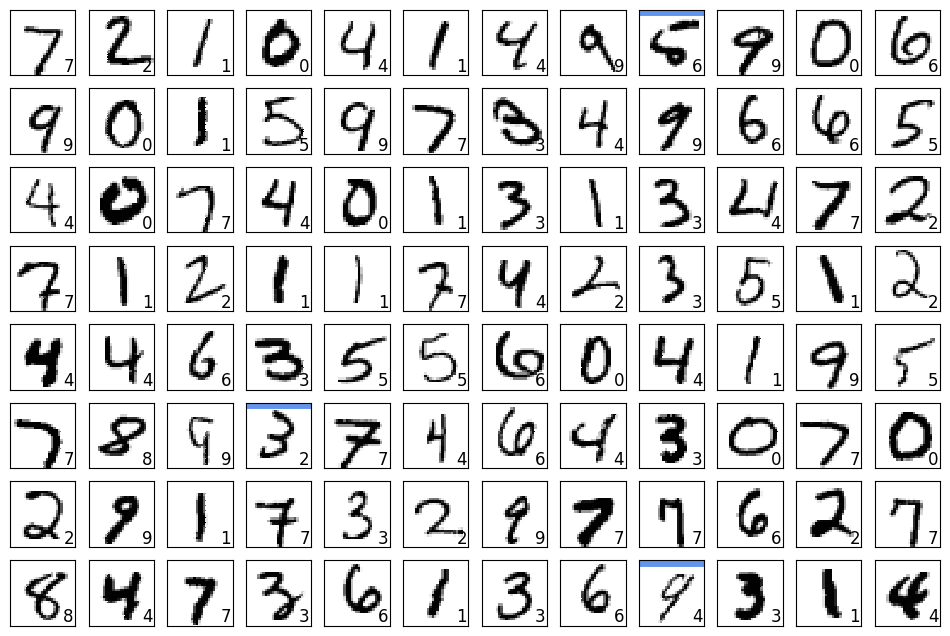

In [ ]:
show_prediction()
plt.show()

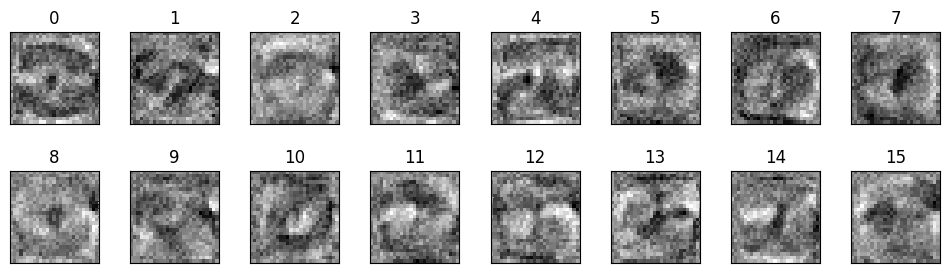

In [ ]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
plt.show()

# **공긴 필터**

## **픽셀은 인접한 픽셀과 연관성이 있다**

In [ ]:
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

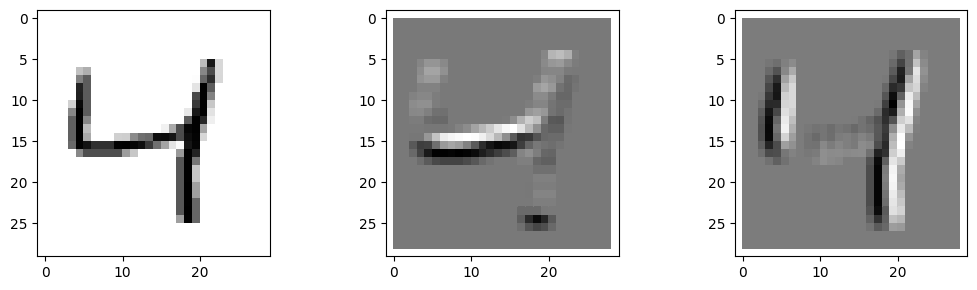

In [ ]:
id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터링
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1-x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

# **CNN**

## **풀링, 드롭아웃, 평탄화**

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu")) # 합성곱층
model.add(Flatten()) #2차원을 1차원으로 늘어뜨림
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 11ms/step - loss: 0.8629 - accuracy: 0.7971 - val_loss: 0.3558 - val_accuracy: 0.9032
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.9107 - val_loss: 0.2657 - val_accuracy: 0.9255
Epoch 3/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9287 - val_loss: 0.2258 - val_accuracy: 0.9390
Epoch 4/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2163 - accuracy: 0.9396 - val_loss: 0.1952 - val_accuracy: 0.9454
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.9478 - val_loss: 0.1699 - val_accuracy: 0.9532
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1634 - accuracy: 0.9550 - val_loss: 0.1540 - val_accuracy: 0.9575
Epoch 7/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9599 - val_loss: 0.1396 - val_accuracy: 0.9608
Epoch 8/20
60/60 [=

313/313 [==============================] - 1s 2ms/step


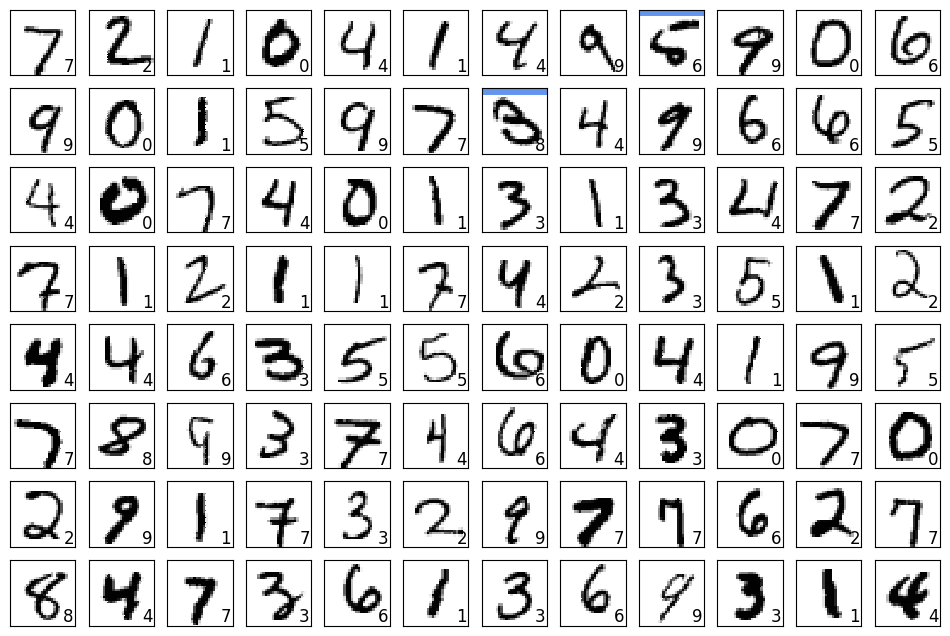

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

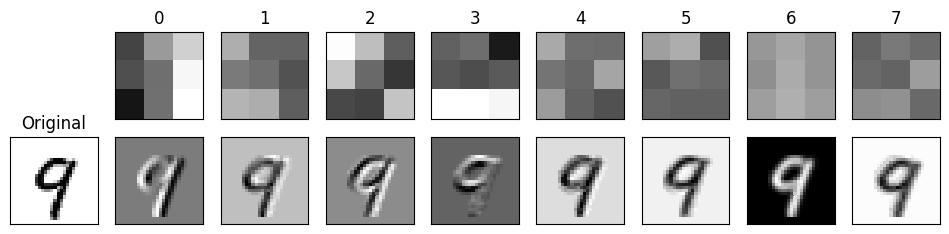

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")
w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

# **MNIST 인식 네트워크 모델**

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) #맥스풀링 필터크기 공간 중 가장 큰 값 선택
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #0.25만큼 떨구기
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 7s 34ms/step - loss: 0.6759 - accuracy: 0.7899 - val_loss: 0.1323 - val_accuracy: 0.9611
Epoch 2/20
60/60 [==============================] - 2s 29ms/step - loss: 0.1400 - accuracy: 0.9574 - val_loss: 0.0696 - val_accuracy: 0.9779
Epoch 3/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0937 - accuracy: 0.9720 - val_loss: 0.0471 - val_accuracy: 0.9844
Epoch 4/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.0404 - val_accuracy: 0.9863
Epoch 5/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 6/20
60/60 [==============================] - 2s 32ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0310 - val_accuracy: 0.9887
Epoch 7/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0262 - val_accuracy: 0.9910
Epoch 8/20
60

313/313 [==============================] - 1s 2ms/step


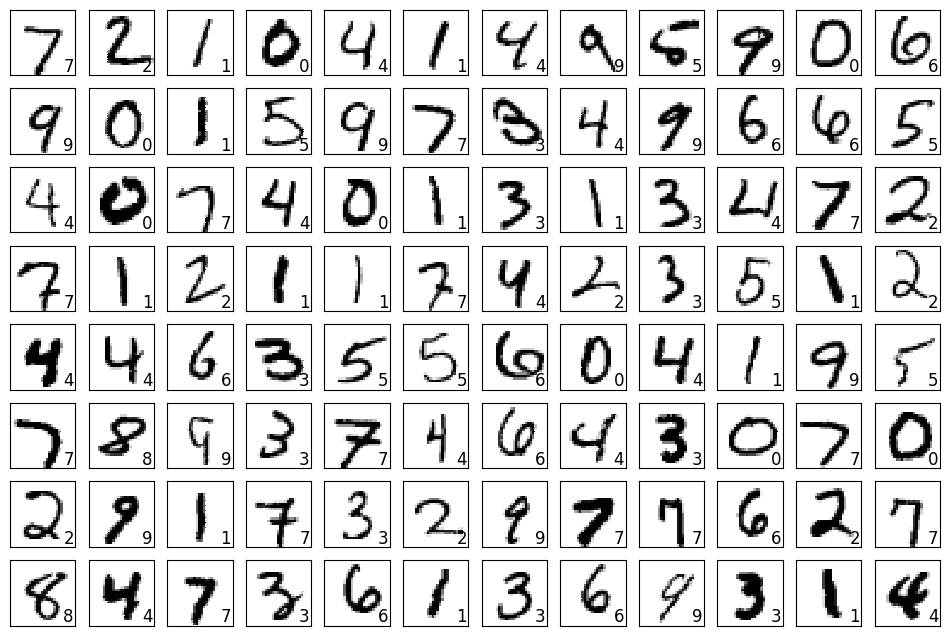

In [ ]:
show_prediction()
plt.show()

# **결론**

FC 레이어보다 CNN의 합성곱신경망이 더 성능이 좋다. 예를 들어 0,0 위치의 픽셀은 27,27의 픽셀값과 연관이 있을 가능성은 매우 적다. 이미지의 픽셀들은 주변 픽셀들과 높은 연관성으 갖고 있다. 이 주변 픽셀들의 범위를 필터의 크기로 정해주고 그들관의 관계를 필터의 가중치를 이용하여 나타낸다.
또한 풀링을 통해 미세한 오차에 의한 값 변화를 줄여주고 Dropout을 통해 앙상블을 한 모델을 합친 효과와 특정 feature에 과도하게 overfitting하는 것을 방지해준다.

# **AFTER**

## **Pooling은 위치가 조금만 어긋나더라도 해당 픽셀에 대응되는 뉴런이 아닌 다른 뉴런이 학습되는 경우가 있었는데, pooling을 통해 조금 더 획일화되게 학습이 가능하게 했다.**

## **Dropout은 특정 비율의 뉴런을 무시하고 학습하는 방법으로 미니배치마다 드롭아웃을 적용하여 앙상블 효과를 얻을 수 있고 이를 통해 오버피팅을 줄일 수 있다. 각 미니배치마다 다른 뉴런을 학습시키는 건 결과적으로 여러 모델을 평균 낸 것으로 이해할 수 있음(?)**